In [ ]:
with open("input4.txt") as fin:
  lines=fin.read().strip().split("\n")

n = 103
m = 101


p = []
v = []

for line in lines:
    a, b = line.split(" ")
    p.append(list(map(int, a.split("=")[1].split(","))))
    v.append(tuple(map(int, b.split("=")[1].split(","))))

    p[-1] = [p[-1][1], p[-1][0]]
    v[-1] = [v[-1][1], v[-1][0]]

N = len(p)

def update():
    global p, v
    for i in range(N):
        p[i][0] = (p[i][0] + v[i][0] + n) % n
        p[i][1] = (p[i][1] + v[i][1] + m) % m


def count_robots(i0, i1, j0, j1):
    ans = 0
    for i in range(i0, i1):
        for j in range(j0, j1):
            for ii, jj in p:
                if i == ii and j == jj:
                    ans += 1
    return ans


for _ in range(100):
    # for i in range(n):
    #     for j in range(m):
    #         x = count_robots(i, i+1, j, j+1)
    #         if x > 0:
    #             print(x, end="")
    #         else:
    #             print(".", end="")
    #     print()

    # print()

    update()

q0 = count_robots(0, n//2, 0, m//2)
q1 = count_robots(n//2+1, n, 0, m//2)
q2 = count_robots(0, n//2, m//2+1, m)
q3 = count_robots(n//2+1, n, m//2+1, m)

print(q0, q1, q2, q3)
print(q0 * q1 * q2 * q3)

In [ ]:
with open("input4.txt") as fin:
    lines = fin.read().strip().split("\n")


n = 103
m = 101


p = []
v = []

for line in lines:
    a, b = line.split(" ")
    p.append(list(map(int, a.split("=")[1].split(","))))
    v.append(tuple(map(int, b.split("=")[1].split(","))))

    p[-1] = [p[-1][1], p[-1][0]]
    v[-1] = [v[-1][1], v[-1][0]]

N = len(p)

def update():
    global p, v
    for i in range(N):
        p[i][0] = (p[i][0] + v[i][0] + n) % n
        p[i][1] = (p[i][1] + v[i][1] + m) % m


def count_robots(i0, i1, j0, j1):
    ans = 0
    for i in range(i0, i1):
        for j in range(j0, j1):
            for ii, jj in p:
                if i == ii and j == jj:
                    ans += 1
    return ans


seen = {}
step = 0
while True:
    picture = [["  "] * (m) for _ in range(n)]
    for i, j in p:
        picture[i][j] = "##"

    picture = "\n".join(["".join(line) for line in picture])
    if picture in seen:
        print(f"Saw this picture at step {seen[picture]}, stopping...")
        break
    seen[picture] = step

    print(picture)
    print("\n" * 2)

    update()

    step += 1

6398


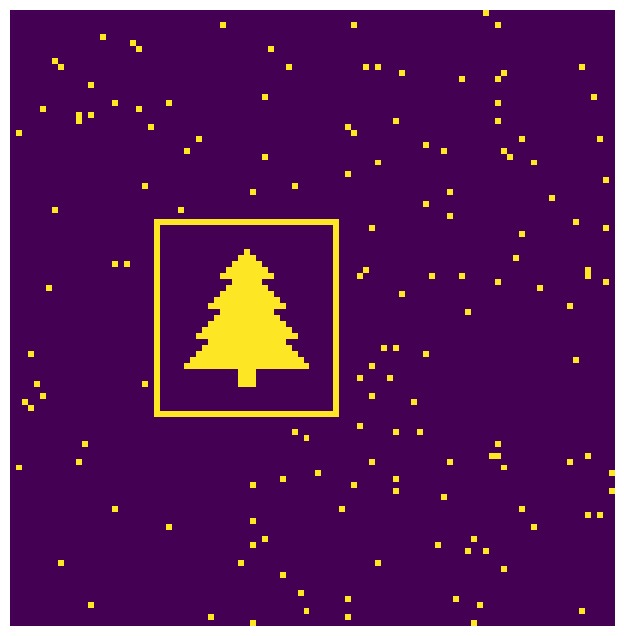

In [12]:
import matplotlib.pyplot as plt
import re


def read_input_14(filename):
    f = open(filename)
    robots = []
    for l in f.readlines():
        x = [int(d) for d in re.findall(r"[-+]?\d+", l)]
        p = x[0] + x[1] * 1j
        v = x[2] + x[3] * 1j
        robots.append((p, v))
    return robots


def move_robots(robots, xmax, ymax):
    newrobots = []
    for p, v in robots:
        p1 = p + v
        x = p1.real
        y = p1.imag
        if x < 0:
            x += xmax
        if x >= xmax:
            x -= xmax
        if y < 0:
            y += ymax
        if y >= ymax:
            y -= ymax
        newrobots.append((x + y * 1j, v))
    return newrobots


def evolve_robots(robots, xmax, ymax, nsec=1):
    for i in range(nsec):
        newrobots = move_robots(robots, xmax, ymax)
        robots = newrobots
    return robots


import numpy as np


def robots_to_grid(robots, xmax, ymax):
    grid = np.zeros((ymax, xmax), dtype=int)
    for p, v in robots:
        x = int(p.real)
        y = int(p.imag)
        grid[y, x] += 1
    return grid


def safety_factor(grid, xmax, ymax):
    sf = 1
    for g in [
        grid[: (ymax - 1) // 2, : (xmax - 1) // 2],
        grid[: (ymax - 1) // 2, (xmax - 1) // 2 + 1 :],
        grid[(ymax - 1) // 2 + 1 :, : (xmax - 1) // 2],
        grid[(ymax - 1) // 2 + 1 :, (xmax - 1) // 2 + 1 :],
    ]:
        sf *= sum(sum(g))
    return sf


filename = "input4.txt"
robots = read_input_14(filename)
xmax = 101
ymax = 103

i = 0
while True:
    i += 1
    newrobots = move_robots(robots, xmax, ymax)
    grid = robots_to_grid(newrobots, xmax, ymax)
    if sum(grid[grid == 1]) == len(robots):
        print(i)
        break
    robots = newrobots

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
plt.gca()
ax.set_axis_off()
plt.imshow(grid)